<!--COURSE_INFORMATION-->
*This notebook contains course material from [CBE 40455 Process Operations](http://jckantor.github.io/CBE40455/) by Jeffrey Kantor (jeff at nd.edu); the content is available [on GitHub](https://github.com/jckantor/CBE40455).*
*The text is released under the [CC-BY-NC-ND-4.0 license](https://creativecommons.org/licenses/by-nc-nd/4.0/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*


<!--NAVIGATION-->
< [#### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE40455](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).](04.05-Warehouse-Fulfillment-Operations.ipynb) | [Contents](index.ipynb) | [Logistics](05.00-Logistics.ipynb) >

<a href="https://colab.research.google.com/github/jckantor/CBE40455/blob/master/notebooks/04.06-Geometric-Brownian-Price-Process.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


##### The latest version of this Jupyter notebook is available at [http://github.com/jckantor/CBE40455](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Geometric Brownian Price Process

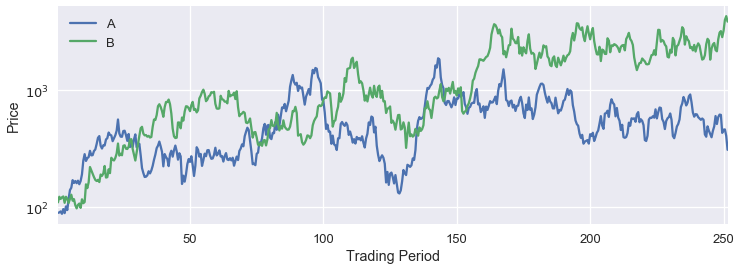

In [1]:
%matplotlib inline
import random 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import simpy
import seaborn as sns
sns.set_context('talk')

class gbm(object):
    def __init__(self, env, name, tick=1.0, P=100.0, mu=0.01, sigma=0.10):
        self.env = env
        self.name = name
        self.tick = tick
        self.t = 0
        self.P = P
        self.hist = pd.Series()
        self.mu = mu
        self.sigma = sigma
        self.env.process(self.run())
        
    def plot(self):
        self.hist.plot(logy=True,label=self.name)
        plt.xlabel('Trading Period')
        plt.ylabel('Price')
        
    def run(self):
        while True:
            yield env.timeout(self.tick)
            self.t += self.tick
            self.P += self.P*(self.mu*self.tick + \
                    self.sigma*random.normalvariate(0,1)*np.sqrt(self.tick))
            self.hist.set_value(self.t,self.P)
    
# create the simulation environment
env = simpy.Environment()

# add the clock process to the environment. Set the tick interval.
a = gbm(env, "A", tick=0.5, mu=0.03, sigma=0.2)
b = gbm(env, "B", tick=0.5, mu=0.03, sigma=0.2)

# run the simulation for a fixed period of time
env.run(until=252.0)

plt.figure(figsize=(12,4))
a.plot()
b.plot()
plt.legend()

## Multiple Simulations

In [2]:
from ipywidgets import interact_manual
import math

N = 20

def sim(mu = 0.0, sigma = 0.1):
    global env
    env = simpy.Environment()
    s = [gbm(env,i, tick=0.5, mu=mu/252.0, sigma=sigma/math.sqrt(252)) for i in range(0,N)]
    env.run(until=252)
    for i in range(0,N):
        s[i].plot()
    
print("Enter annualized mu and sigma")
interact_manual(sim,mu=(-0.2,0.2,.001),sigma=(0.00,.6,.01))

Enter annualized mu and sigma


<function __main__.sim>

<!--NAVIGATION-->
< [#### The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE40455](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).](04.05-Warehouse-Fulfillment-Operations.ipynb) | [Contents](index.ipynb) | [Logistics](05.00-Logistics.ipynb) >

<a href="https://colab.research.google.com/github/jckantor/CBE40455/blob/master/notebooks/04.06-Geometric-Brownian-Price-Process.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
